# HW 2 - Titanic 

In this HW, we would like to better understand what features of the passengers are helpful for predicting whether they survived or not. Whether the passanger survived (1) or not (0) is given in the Survived column. 

In [40]:
#Put your imports here
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

First read in the dataframe into a variable called df_titanic. Use the head method to check that you have read everything correctly.

In [41]:
#Write your code here
df_titanic = pd.read_csv("Titanic.csv", index_col = 0)
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.


**Question 1 (SQL + Plotting):** Write 4 separate queries to create the following 4 dataframe, which should each have an Age and Fare columns (We won't use the Fare column , but this is just for practice):

- Mr_survived : Have a title of Mr. (Don't forget the '.' in your WHERE statement when filtering for 'Mr.') and they survived.
- Mr_died: Have title of Mr. and they died.
- Mrs_survived : Have a title of Mrs. and they survived.
- Mrs_died: Have title of Mrs. and they died.



In [42]:
#Write your code here
Mr_survived = sqldf("SELECT Age, Fare, Sex, Title FROM df_titanic WHERE Title='Mr.' AND Survived = 1")
Mr_survived

,Age,Fare,Sex,Title
0,NaN,13.0000,male,Mr.
1,34.0,13.0000,male,Mr.
2,28.0,35.5000,male,Mr.
3,NaN,7.2292,male,Mr.
4,NaN,35.5000,male,Mr.
...,...,...,...,...
76,NaN,7.7500,male,Mr.
77,32.0,56.4958,male,Mr.
78,NaN,29.7000,male,Mr.
79,51.0,26.5500,male,Mr.


In [43]:
Mr_died = sqldf("SELECT Age, Fare, Sex, Title FROM df_titanic WHERE Title='Mr.' AND Survived = 0")
Mr_died

,Age,Fare,Sex,Title
0,22.0,7.2500,male,Mr.
1,35.0,8.0500,male,Mr.
2,NaN,8.4583,male,Mr.
3,54.0,51.8625,male,Mr.
4,20.0,8.0500,male,Mr.
...,...,...,...,...
431,NaN,7.8958,male,Mr.
432,33.0,7.8958,male,Mr.
433,28.0,10.5000,male,Mr.
434,25.0,7.0500,male,Mr.


In [44]:
#Mrs_survived : Have a title of Mrs. and they survived.
Mrs_survived  = sqldf("SELECT Age, Fare, Sex, Title FROM df_titanic WHERE Title='Mrs.' AND Survived = 1")
Mrs_survived

,Age,Fare,Sex,Title
0,38.0,71.2833,female,Mrs.
1,35.0,53.1000,female,Mrs.
2,27.0,11.1333,female,Mrs.
3,14.0,30.0708,female,Mrs.
4,55.0,16.0000,female,Mrs.
...,...,...,...,...
93,42.0,13.0000,female,Mrs.
94,47.0,52.5542,female,Mrs.
95,28.0,24.0000,female,Mrs.
96,56.0,83.1583,female,Mrs.


In [45]:
Mrs_died = sqldf("SELECT Age, Fare, Sex, Title FROM df_titanic WHERE Title='Mrs.' AND Survived = 0")
Mrs_died

,Age,Fare,Sex,Title
0,31.0,18.0000,female,Mrs.
1,40.0,9.4750,female,Mrs.
2,27.0,21.0000,female,Mrs.
3,18.0,17.8000,female,Mrs.
4,47.0,14.5000,female,Mrs.
5,NaN,15.2458,female,Mrs.
6,45.0,27.9000,female,Mrs.
7,29.0,10.4625,female,Mrs.
8,41.0,20.2125,female,Mrs.
9,26.0,26.0000,female,Mrs.


Each of these dataframes has Ages missing. For each data frame, fill in the missing Ages with the average age of the other passengers in that dataframe. 

In [46]:
#Write your code here
mean_age_1 = Mr_survived.Age.mean()
Mr_survived.fillna({'Age':mean_age_1}, inplace = True)

mean_age_2 = Mr_died.Age.mean()
Mr_died.fillna({'Age':mean_age_2}, inplace = True)

mean_age_3 = Mrs_survived.Age.mean()
Mrs_survived.fillna({'Age':mean_age_3}, inplace = True)

mean_age_4 = Mrs_survived.Age.mean()
Mrs_died.fillna({'Age':mean_age_4}, inplace = True)

In [47]:
#Check the result
Mr_survived

,Age,Fare,Sex,Title
0,33.044776,13.0000,male,Mr.
1,34.000000,13.0000,male,Mr.
2,28.000000,35.5000,male,Mr.
3,33.044776,7.2292,male,Mr.
4,33.044776,35.5000,male,Mr.
...,...,...,...,...
76,33.044776,7.7500,male,Mr.
77,32.000000,56.4958,male,Mr.
78,33.044776,29.7000,male,Mr.
79,51.000000,26.5500,male,Mr.


Now, produce the following histograms, which shows the distribution of ages of Mr./Mrs. who survived/dies. I set figsize = (12,6) and you may find the alpha input to the plot() method useful for getting the transparent nature of the plots below.

 <img src="First_Plot.png">

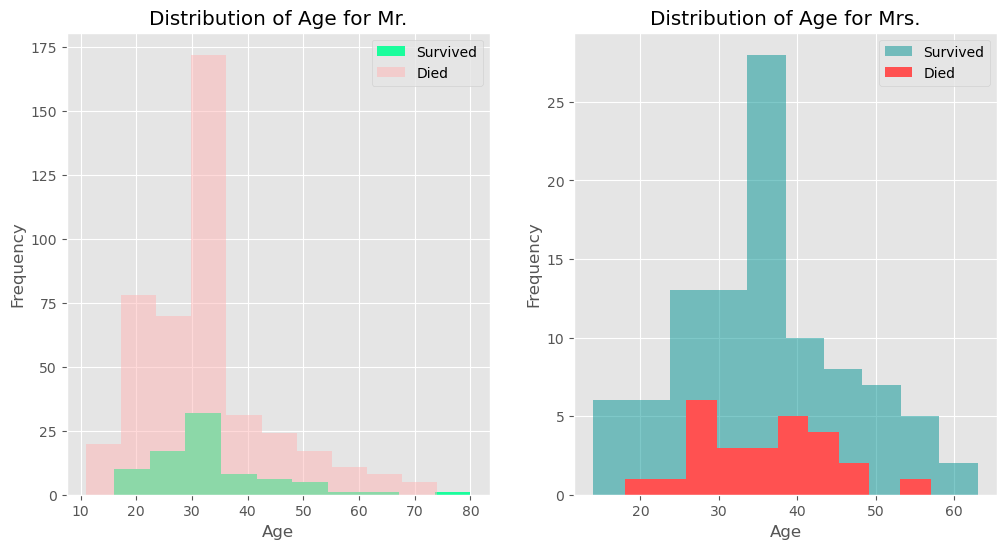

In [48]:
#Write your code here to produce the plots

#plt.style.use("ggplot")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.set(title = "Distribution of Age for Mr.", xlabel="Age")
ax2.set(title = "Distribution of Age for Mrs.", xlabel="Age")

#add request for tranparency by using alpha=0.5
Mr_survived.Age.plot(kind="hist", color ="#1AFD9C", label = 'Survived', ax=ax1)
Mr_died.Age.plot(kind="hist", color ="#FFB5B5", label = 'Died', ax=ax1, alpha=0.5)
ax1.legend(loc=1)

Mrs_survived.Age.plot(kind="hist", color ="#009393", label = 'Survived', ax=ax2, alpha=0.5)
Mrs_died.Age.plot(kind="hist", color ="#FF5151", label = 'Died', ax=ax2)
ax2.legend(loc=1)

**Question 2 (SQL):** Write a single query which finds the fraction of first class (Pclass = 1) female passengers who survived. 

In [49]:
sqldf("SELECT AVG(Survived) AS Survived_Fraction FROM df_titanic WHERE Pclass = 1 AND Sex = 'female'")

,Survived_Fraction
0,0.967391


**Question 3 (SQL)**:  Write a single query which finds the max fare paid from passengers who embarked from each port.

In [50]:
sqldf("SELECT Name, Embarked, MAX(Fare) FROM df_titanic GROUP BY Embarked") 

,Name,Embarked,MAX(Fare)
0,"Ward, Miss. Anna",C,512.3292
1,"Minahan, Dr. William Edward",Q,90.0000
2,"Fortune, Mr. Charles Alexander",S,263.0000


**Question 4 (SQL)**:  Update the previous query to find the max fare paid from passengers who embarked from each port at each class (Pclass).

In [51]:
max_fare_update = sqldf("SELECT Name, Embarked, Pclass, MAX(Fare) FROM df_titanic \
GROUP BY Embarked, Pclass") 
max_fare_update

,Name,Embarked,Pclass,MAX(Fare)
0,"Ward, Miss. Anna",C,1,512.3292
1,"Laroche, Miss. Simonne Marie Anne Andree",C,2,41.5792
2,"Peter, Miss. Anna",C,3,22.3583
3,"Minahan, Dr. William Edward",Q,1,90.0000
4,"Keane, Miss. Nora A",Q,2,12.3500
5,"Rice, Master. Eugene",Q,3,29.1250
6,"Fortune, Mr. Charles Alexander",S,1,263.0000
7,"Hood, Mr. Ambrose Jr",S,2,73.5000
8,"Sage, Master. Thomas Henry",S,3,69.5500


**Question 5 (SQL):**  Write a single query to find the combined survival percentage of males over >=50 and women over >=40.

In [52]:
sqldf("SELECT AVG(Survived) AS Survival_percentage FROM df_titanic WHERE \
CASE WHEN Sex = 'male' THEN Age>=50 ELSE Age >= 40 END")

,Survival_percentage
0,0.457143
